In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('anomaly_data2.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [3]:
cpu_data = df[['cpu_usage', 'timestamp']]
memory_data = df[['memory_usage', 'timestamp']]

In [4]:
def moving_average(data, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')

In [6]:
def identify_deviation(data, window_size, sigma):
    avg = moving_average(data, window_size).tolist()
    residual = data - avg
    std = np.std(residual)
    return np.where(residual > std*sigma, 1, 0)

In [7]:
def detect_anomaly(data, window_size, sigma):
    deviation = identify_deviation(data, window_size, sigma)
    index = np.where(deviation == 1)
    return index[0].tolist()

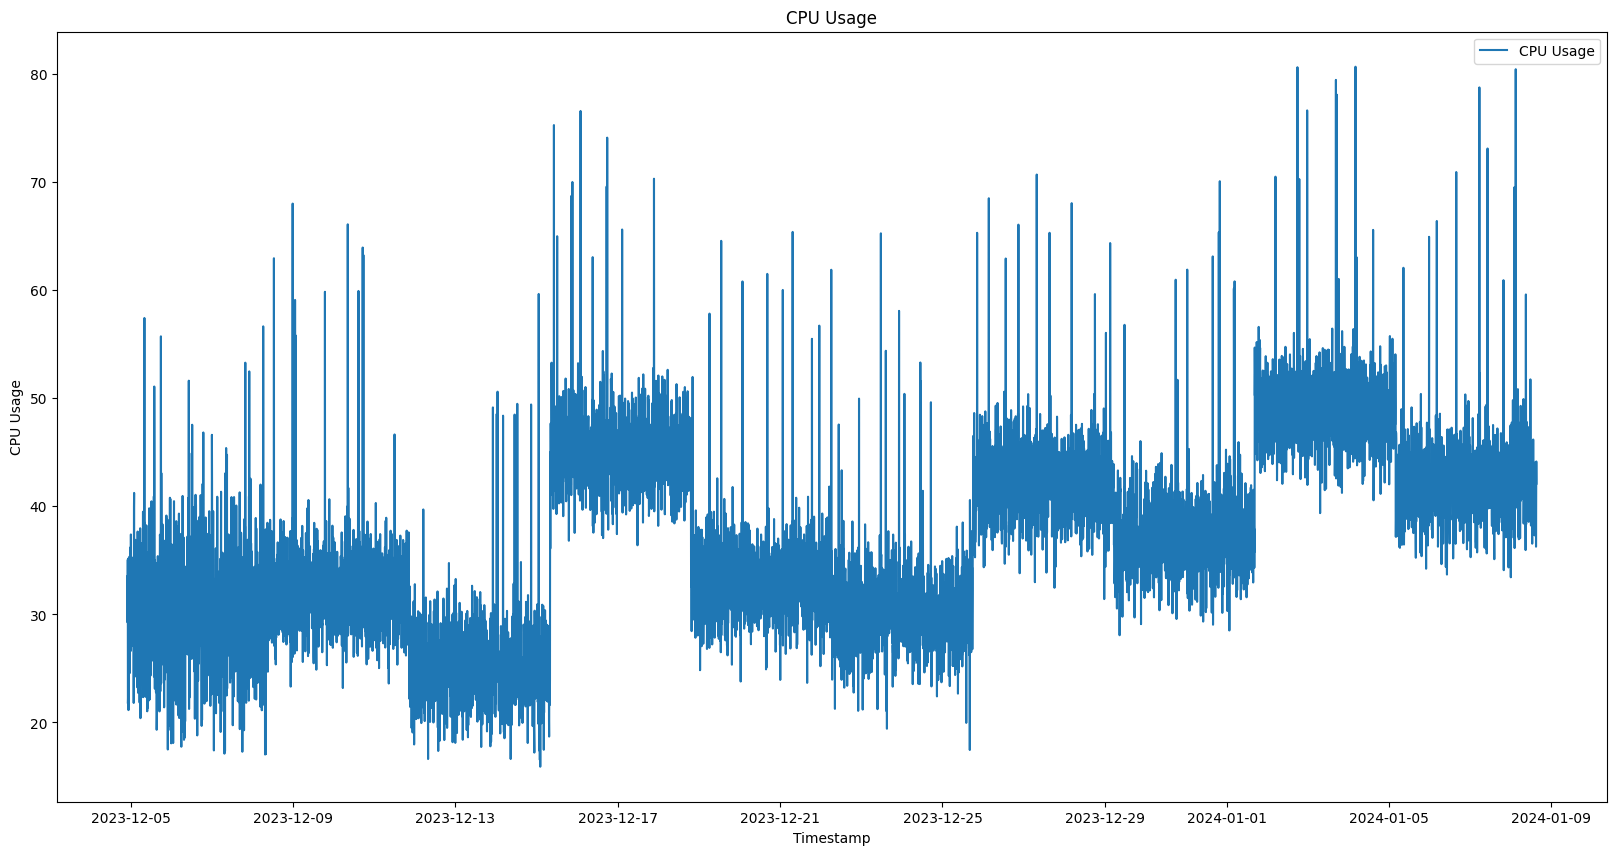

In [8]:
#plot anomaly with window size 10 and sigma 2.5
plt.figure(figsize=(20,10))
plt.plot(cpu_data['timestamp'], cpu_data['cpu_usage'], label='CPU Usage')
plt.title('CPU Usage')
plt.xlabel('Timestamp')
plt.ylabel('CPU Usage')
# plt.xlim(pd.Timestamp('2023-12-16'), pd.Timestamp('2023-12-22'))
# plt.xlim(pd.Timestamp('2023-12-05'), pd.Timestamp('2023-12-08'))
# plt.xlim(pd.Timestamp('2024-01-08'), pd.Timestamp('2024-01-09'))
plt.legend()
plt.show()


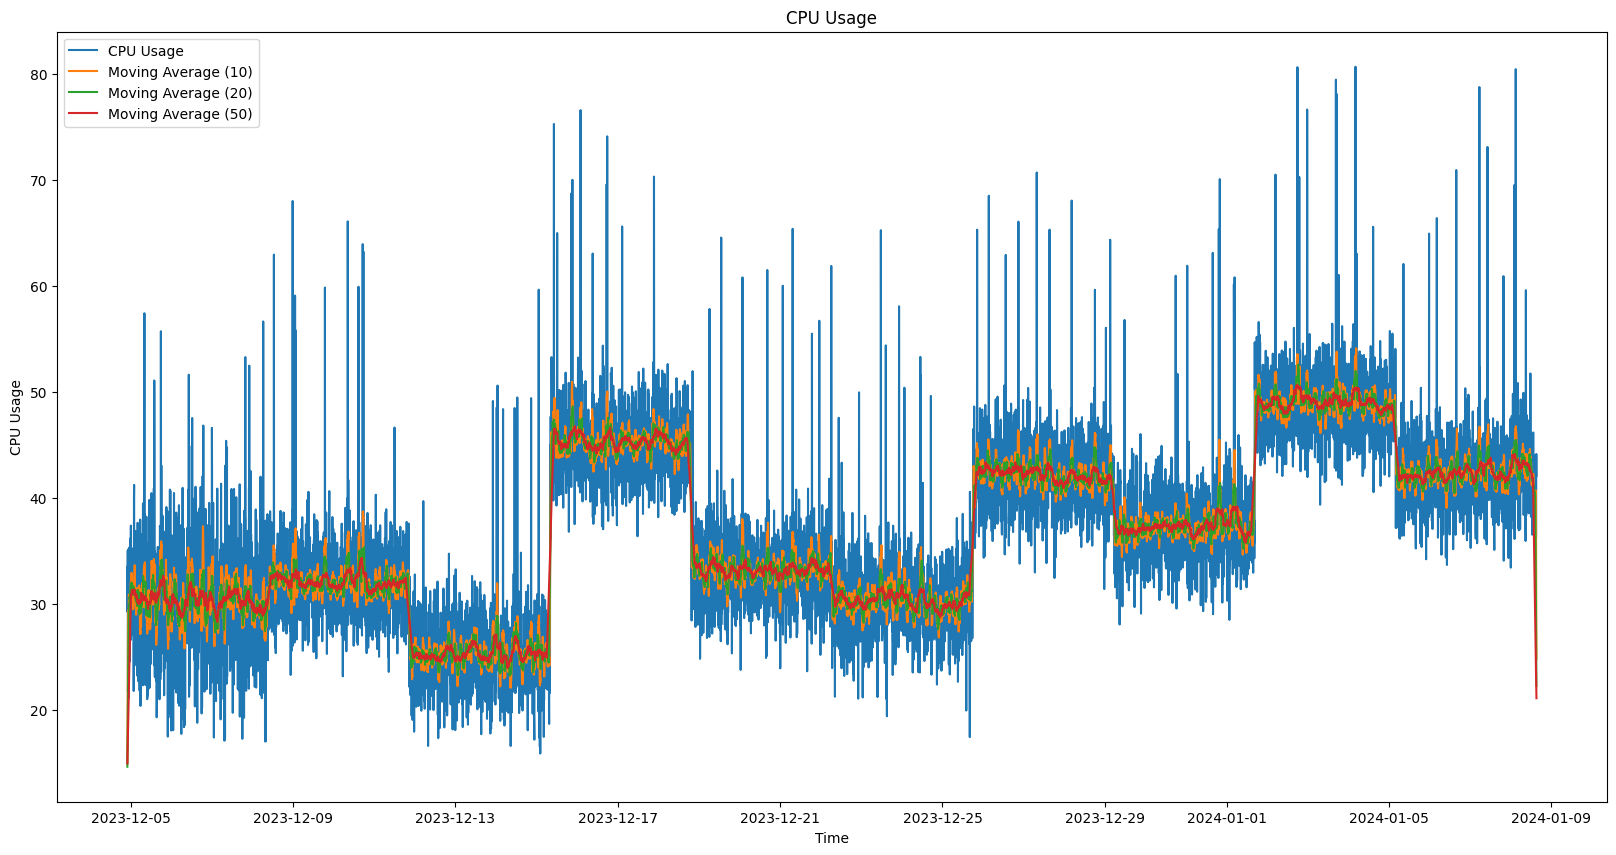

In [9]:
#plot moving average
plt.figure(figsize=(20,10))
plt.plot(cpu_data['timestamp'], cpu_data['cpu_usage'], label='CPU Usage')
plt.plot(cpu_data['timestamp'], moving_average(cpu_data['cpu_usage'], 10), label='Moving Average (10)')
plt.plot(cpu_data['timestamp'], moving_average(cpu_data['cpu_usage'], 20), label='Moving Average (20)')
plt.plot(cpu_data['timestamp'], moving_average(cpu_data['cpu_usage'], 50), label='Moving Average (50)')
plt.title('CPU Usage')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.legend()
plt.show()

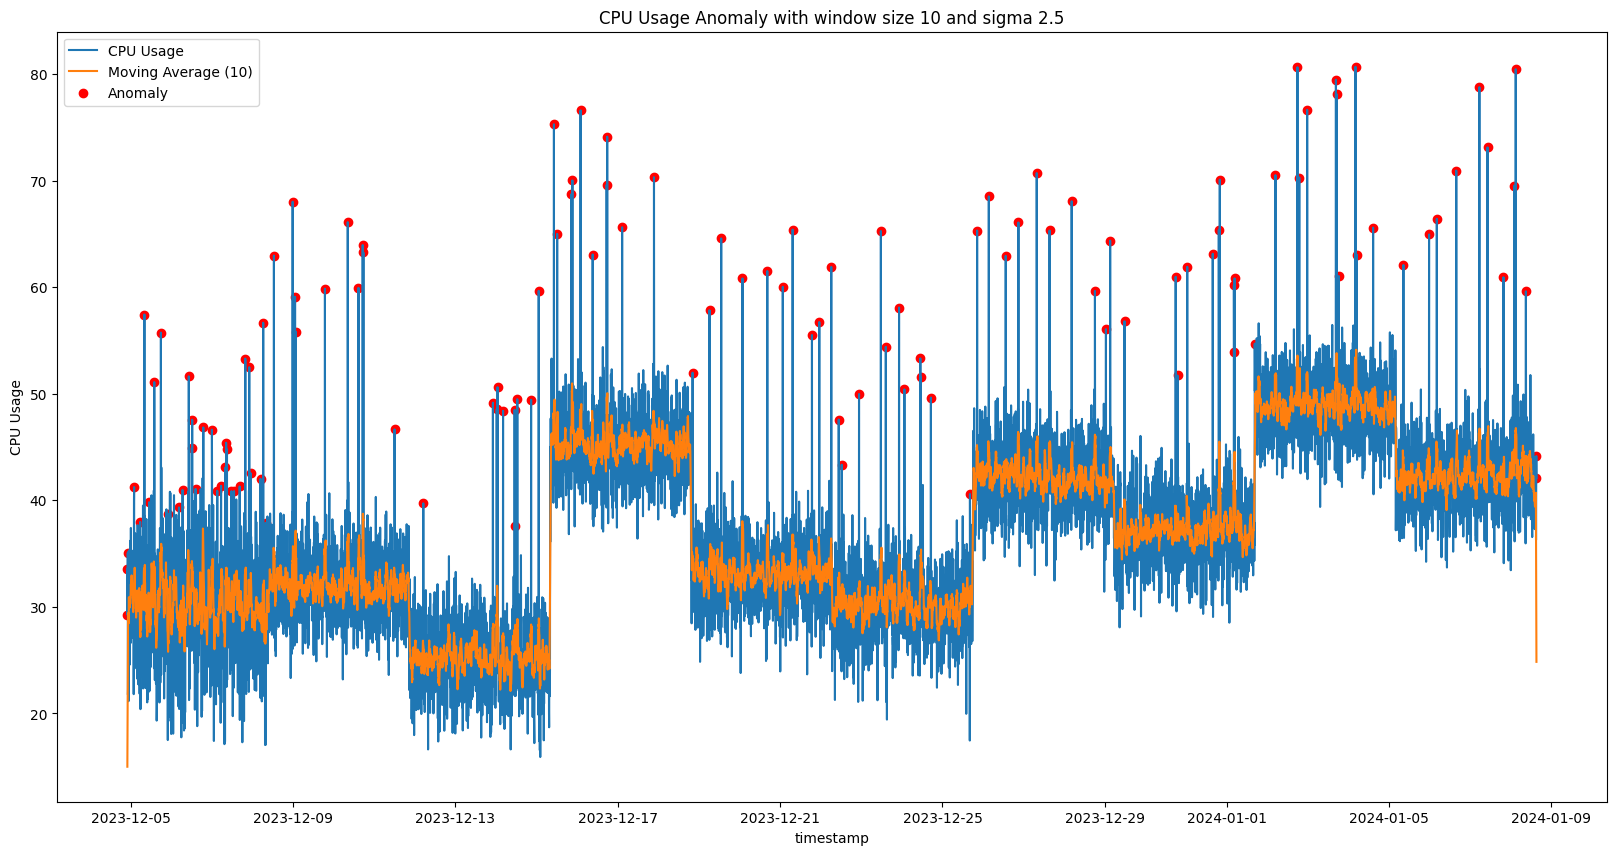

Total Anomaly : 126


In [10]:
#plot anomaly with window size 10 and sigma 2.5
plt.figure(figsize=(20,10))
plt.plot(cpu_data['timestamp'], cpu_data['cpu_usage'], label='CPU Usage')
plt.plot(cpu_data['timestamp'], moving_average(cpu_data['cpu_usage'], 10), label='Moving Average (10)')
plt.scatter(cpu_data['timestamp'][detect_anomaly(cpu_data['cpu_usage'], 10, 2.5)], cpu_data['cpu_usage'][detect_anomaly(cpu_data['cpu_usage'], 10, 2.5)], label='Anomaly', color='red')
plt.title('CPU Usage Anomaly with window size 10 and sigma 2.5')
plt.xlabel('timestamp')
plt.ylabel('CPU Usage')
# plt.xlim(pd.Timestamp('2023-12-16'), pd.Timestamp('2023-12-22'))
# plt.xlim(pd.Timestamp('2023-12-05'), pd.Timestamp('2023-12-08'))
# plt.xlim(pd.Timestamp('2024-01-08'), pd.Timestamp('2024-01-09'))
plt.legend()
plt.show()
print("Total Anomaly :", len(detect_anomaly(cpu_data['cpu_usage'], 10, 2.5)))


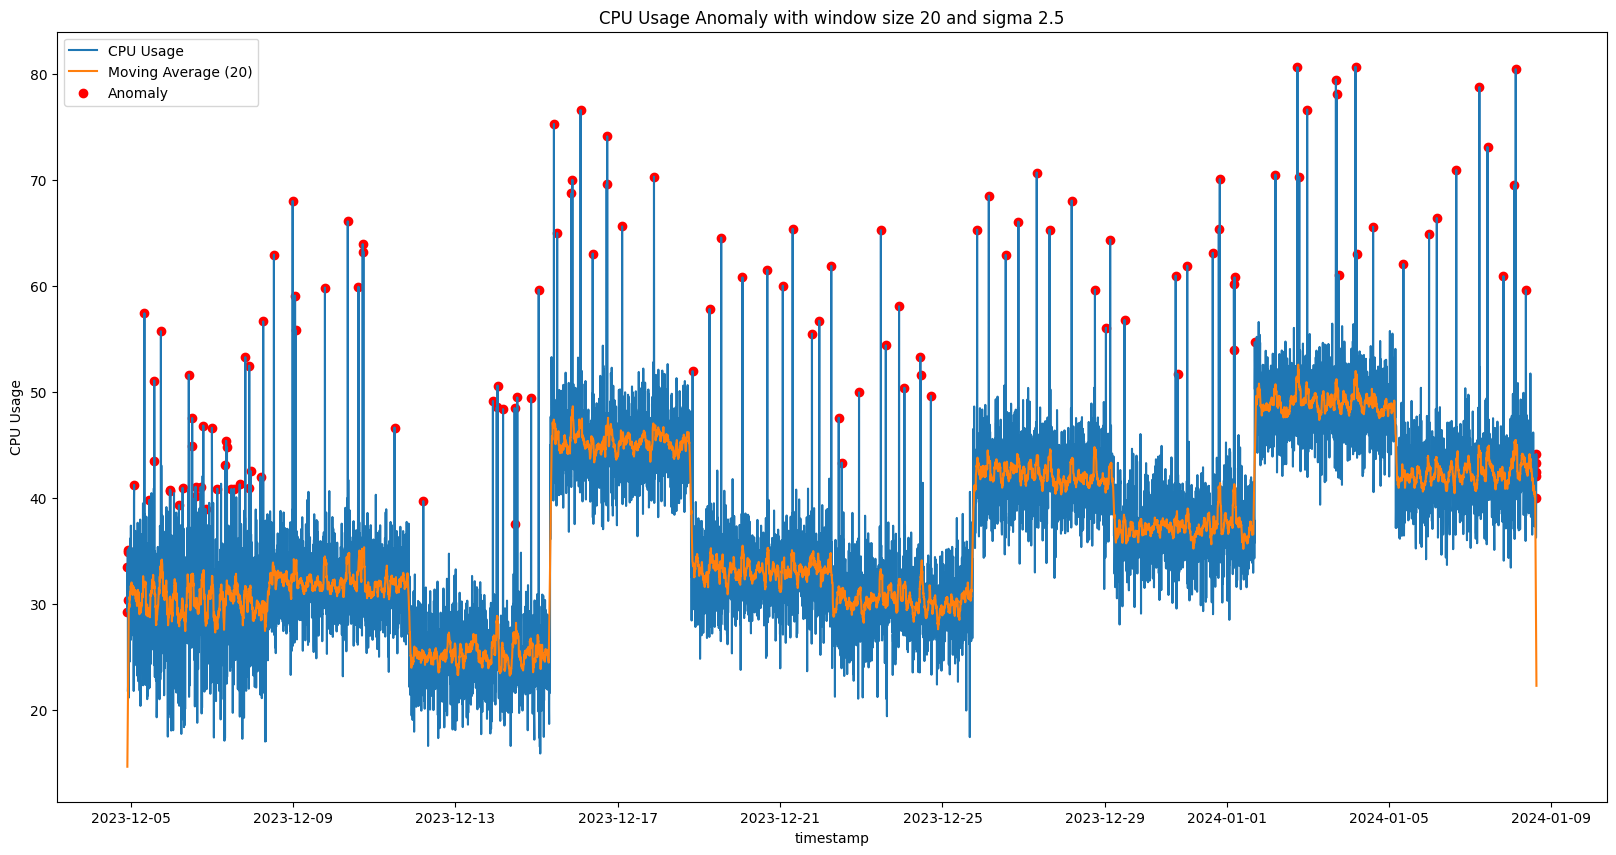

Total Anomaly : 133


In [11]:
#plot anomaly with window size 20 and sigma 2.5
plt.figure(figsize=(20,10))
plt.plot(cpu_data['timestamp'], cpu_data['cpu_usage'], label='CPU Usage')
plt.plot(cpu_data['timestamp'], moving_average(cpu_data['cpu_usage'], 20), label='Moving Average (20)')
plt.scatter(cpu_data['timestamp'][detect_anomaly(cpu_data['cpu_usage'], 20, 2.5)], cpu_data['cpu_usage'][detect_anomaly(cpu_data['cpu_usage'], 20, 2.5)], label='Anomaly', color='red')
plt.title('CPU Usage Anomaly with window size 20 and sigma 2.5')
plt.xlabel('timestamp')
plt.ylabel('CPU Usage')
# plt.xlim(pd.Timestamp('2023-12-05'), pd.Timestamp('2023-12-06'))
# plt.xlim(pd.Timestamp('2024-01-08'), pd.Timestamp('2024-01-09'))
plt.legend()
plt.show()
print("Total Anomaly :", len(detect_anomaly(cpu_data['cpu_usage'], 20, 2.5)))


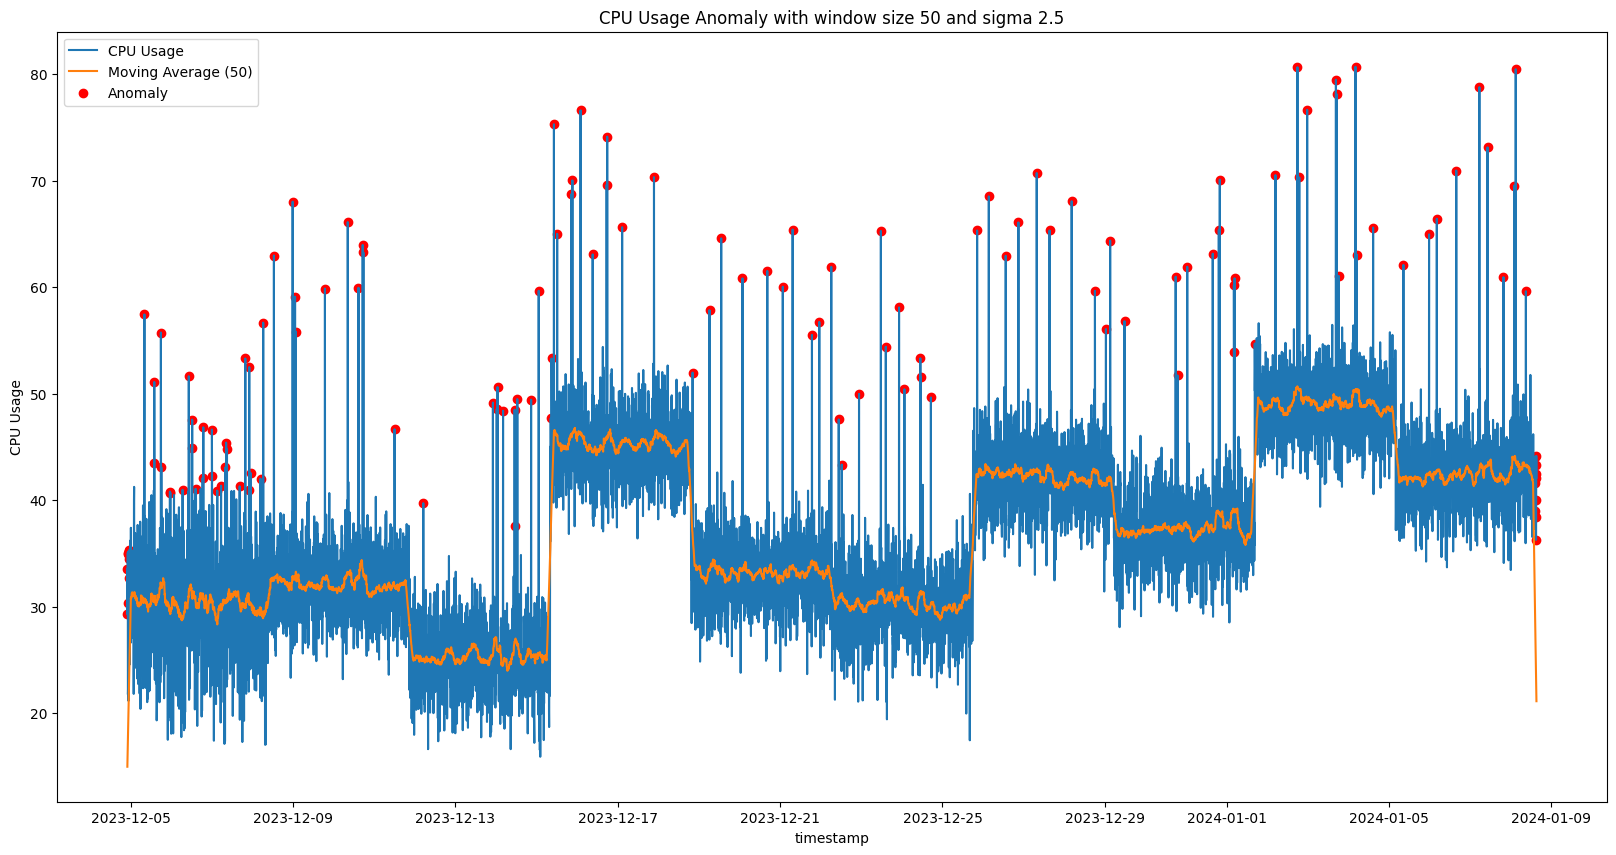

Total Anomaly : 140


In [12]:
#plot anomaly with window size 50 and sigma 2.5
plt.figure(figsize=(20,10))
plt.plot(cpu_data['timestamp'], cpu_data['cpu_usage'], label='CPU Usage')
plt.plot(cpu_data['timestamp'], moving_average(cpu_data['cpu_usage'], 50), label='Moving Average (50)')
plt.scatter(cpu_data['timestamp'][detect_anomaly(cpu_data['cpu_usage'], 50, 2.5)], cpu_data['cpu_usage'][detect_anomaly(cpu_data['cpu_usage'], 50, 2.5)], label='Anomaly', color='red')
plt.title('CPU Usage Anomaly with window size 50 and sigma 2.5')
plt.xlabel('timestamp')
plt.ylabel('CPU Usage')
# plt.xlim(pd.Timestamp('2023-06-50'), pd.Timestamp('2023-07-01'))
# plt.xlim(pd.Timestamp('2023-07-02'), pd.Timestamp('2023-07-08'))
plt.legend()
plt.show()
print("Total Anomaly :", len(detect_anomaly(cpu_data['cpu_usage'], 50, 2.5)))


In [13]:
anomaly = detect_anomaly(cpu_data['cpu_usage'], 10, 2.5)
anomaly = np.array(anomaly)
len(anomaly)

126

In [14]:
cpu_data['anomaly'] = 0
cpu_data['anomaly'][anomaly] = 1
cpu_data.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_10096\4246543511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpu_data['anomaly'][anomaly] = 1


,cpu_usage,timestamp,anomaly
0,33.512495,2023-12-04 22:00:00+00:00,1
1,29.268888,2023-12-04 22:05:00+00:00,1
2,30.358837,2023-12-04 22:10:00+00:00,0
3,35.063998,2023-12-04 22:15:00+00:00,1
4,21.756007,2023-12-04 22:20:00+00:00,0


In [15]:
cpu_data = cpu_data[4:]

In [16]:
cpu_data

,cpu_usage,timestamp,anomaly
4,21.756007,2023-12-04 22:20:00+00:00,0
5,22.302332,2023-12-04 22:25:00+00:00,0
6,34.959884,2023-12-04 22:30:00+00:00,0
7,29.625328,2023-12-04 22:35:00+00:00,0
8,21.144231,2023-12-04 22:40:00+00:00,0
...,...,...,...
9995,43.327759,2024-01-08 14:55:00+00:00,0
9996,36.268165,2024-01-08 15:00:00+00:00,0
9997,40.028437,2024-01-08 15:05:00+00:00,0
9998,44.154303,2024-01-08 15:10:00+00:00,1


In [ ]:
cpu_data.to_csv('cpu_anomaly_data2.csv', index=False)